<a href="https://colab.research.google.com/github/MIHIR-110103/ML-Models/blob/main/Decision_Tree_Pruning_using_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/sample_data/Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data.diagnosis.unique()

array([0, 1])

In [ ]:
X=data.drop(["diagnosis"],axis=1)
Y=data["diagnosis"]

In [ ]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
n=int(input("Enter max depth value: "))

Enter max depth value: 5


In [ ]:
clf=DecisionTreeClassifier(max_depth=n)

In [ ]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_train_pred=clf.predict(X_train)


In [ ]:
y_test_pred=clf.predict(X_test)


In [ ]:
from sklearn import tree

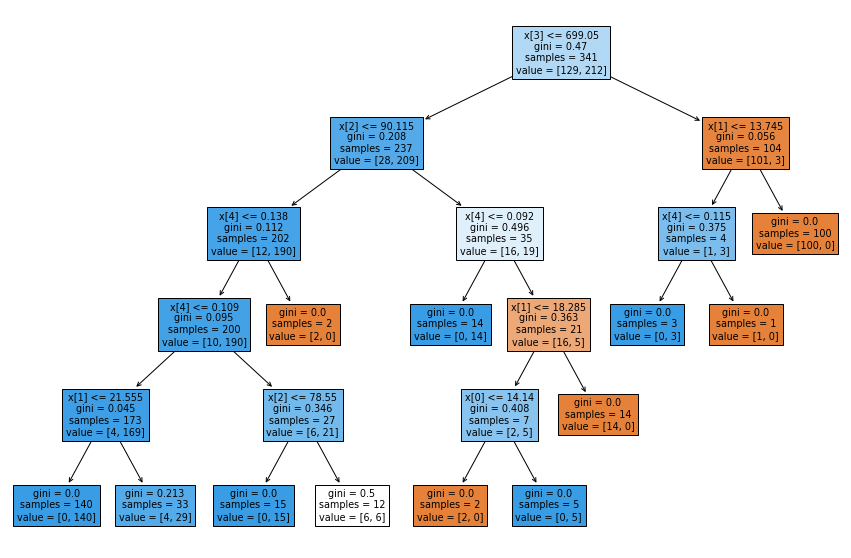

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, filled=True)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
print(f"training score = {accuracy_score(Y_train,y_train_pred)}")

training score = 0.9706744868035191


In [ ]:
cm=confusion_matrix(Y_train,y_train_pred,labels=clf.classes_)

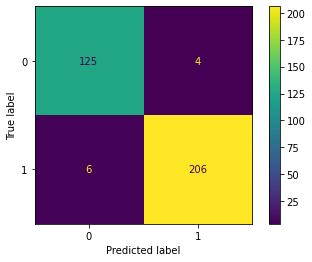

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(f"testing score = {accuracy_score(Y_test,y_test_pred)}")

testing score = 0.8991228070175439


In [ ]:
cm=confusion_matrix(Y_test,y_test_pred,labels=clf.classes_)

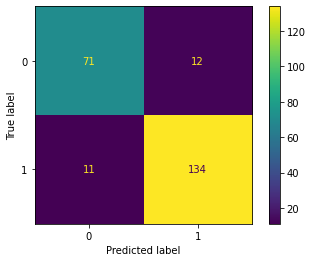

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.92      0.92      0.92       146

    accuracy                           0.90       228
   macro avg       0.89      0.89      0.89       228
weighted avg       0.90      0.90      0.90       228



In [ ]:
maxdepth=[]
for i in range(1,n+1):
  maxdepth.append(i)

maxdepth

[1, 2, 3, 4, 5]

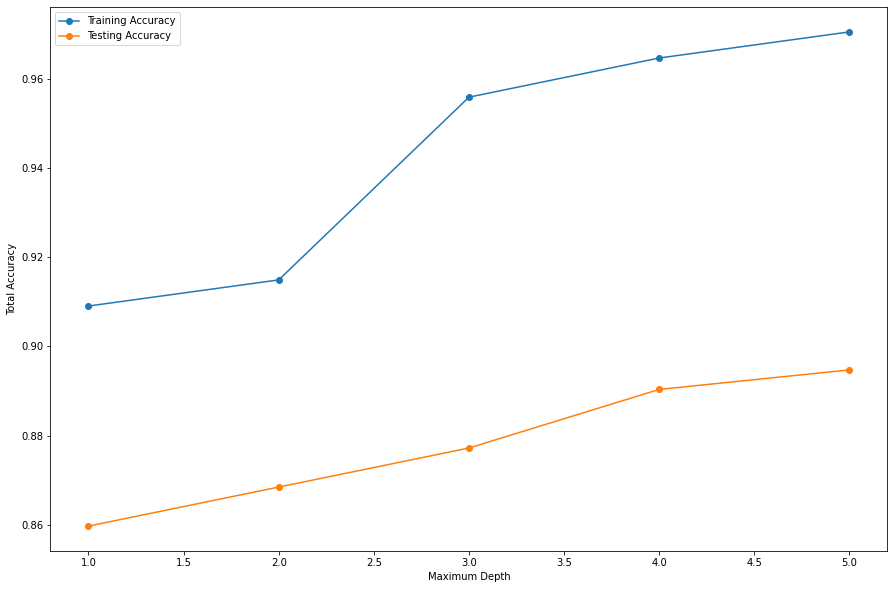

In [ ]:
train=[]
test=[]
for x in maxdepth:
  dtc =DecisionTreeClassifier(max_depth=x)
  dtc.fit(X_train,Y_train)

  y_train_pred = dtc.predict(X_train)
  train_z_prob = dtc.predict_proba(X_train)[:,1]

  y_test_pred = dtc.predict(X_test)
  test_z_prob = dtc.predict_proba(X_test)[:,1]

  train.append(accuracy_score(Y_train, y_train_pred))
  test.append(accuracy_score(Y_test, y_test_pred))

fig = plt.figure(figsize=(15,10))
x = np.arange(len(maxdepth)) + 1 # Create domain for plot
plt.plot(x, train, label='Training Accuracy',marker="o") # Plot training error over domain
plt.plot(x, test, label='Testing Accuracy',marker="o") # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

Decision Tree Pre-Pruning

In [ ]:
parameter={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
Tree = DecisionTreeClassifier()
CV = GridSearchCV(Tree,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
CV.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
CV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
y_pred=CV.predict(X_train)

In [ ]:
score=accuracy_score(y_pred,Y_train)
score

0.9530791788856305

In [ ]:
y_pred=CV.predict(X_test)

In [ ]:
score=accuracy_score(y_pred,Y_test)
score

0.8640350877192983